# Dataset for Binary Classification 

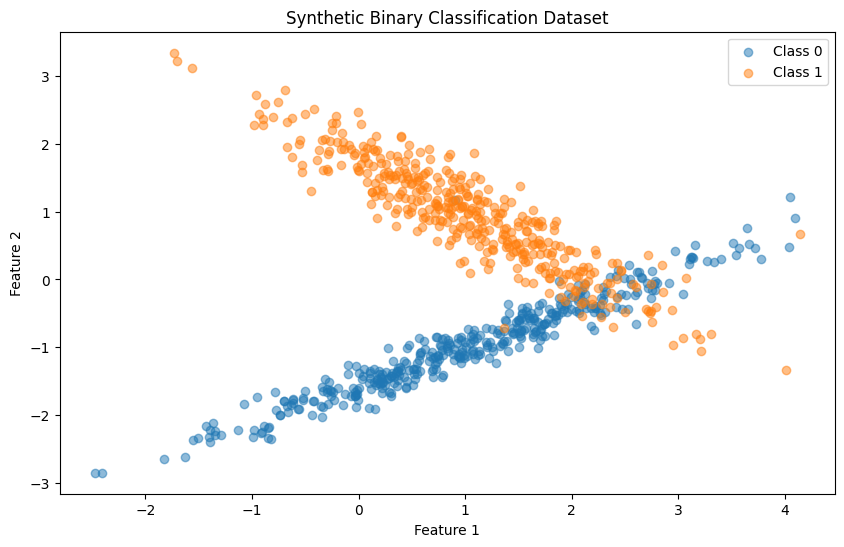

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split

# Generate a simplistic synthetic dataset with binary classes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42, n_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the synthetic dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.legend()
plt.show()


# Learning Curves 

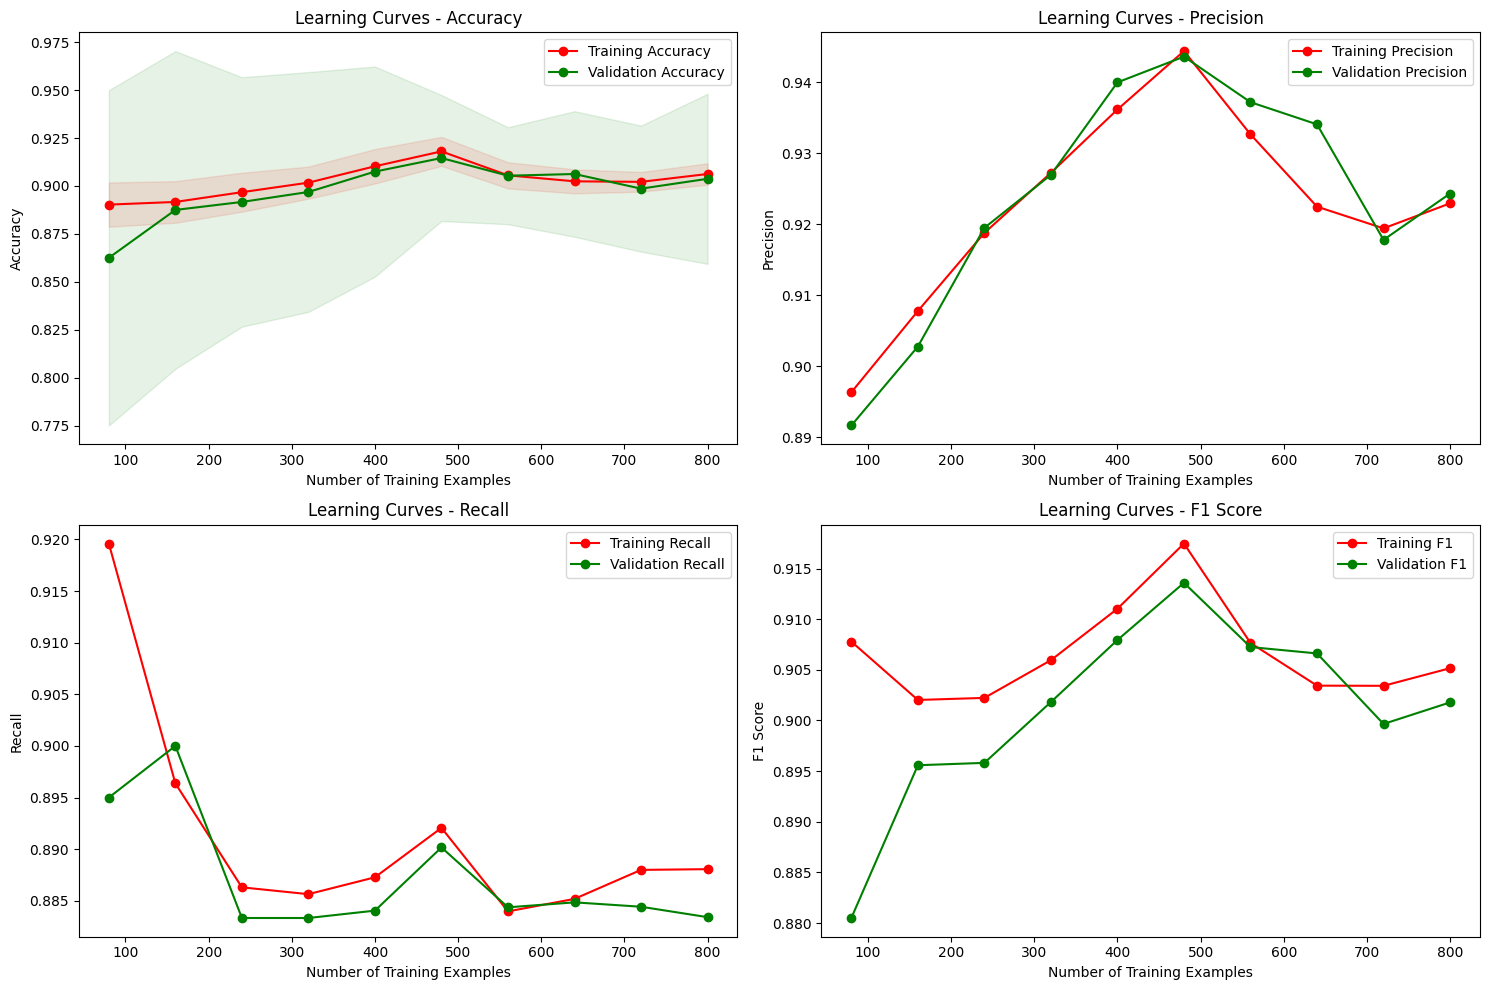

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

def learning_curve(model, X, y, cv, train_sizes):
    # Initialize lists to store scores
    train_scores, val_scores = [], []
    train_precision, val_precision = [], []
    train_recall, val_recall = [], []
    train_f1, val_f1 = [], []
    train_scores_std, val_scores_std = [], []

    for train_size in train_sizes:
        # Sample the training set according to the current size
        X_subset = X[:int(train_size * len(X))]
        y_subset = y[:int(train_size * len(y))]
        
        cv = StratifiedKFold(n_splits=10)
        fold_scores = {'train': [], 'val': [], 'train_precision': [], 'val_precision': [],
                       'train_recall': [], 'val_recall': [], 'train_f1': [], 'val_f1': []}

        for train_index, test_index in cv.split(X_subset, y_subset):
            X_fold, X_val_fold = X_subset[train_index], X_subset[test_index]
            y_fold, y_val_fold = y_subset[train_index], y_subset[test_index]
            
            # Fit the model and make predictions
            clf.fit(X_fold, y_fold)
            y_train_pred = clf.predict(X_fold)
            y_val_pred = clf.predict(X_val_fold)
            
            # Calculate and store various metrics
            fold_scores['train'].append(clf.score(X_fold, y_fold))
            fold_scores['val'].append(clf.score(X_val_fold, y_val_fold))
            fold_scores['train_precision'].append(precision_score(y_fold, y_train_pred))
            fold_scores['val_precision'].append(precision_score(y_val_fold, y_val_pred))
            fold_scores['train_recall'].append(recall_score(y_fold, y_train_pred))
            fold_scores['val_recall'].append(recall_score(y_val_fold, y_val_pred))
            fold_scores['train_f1'].append(f1_score(y_fold, y_train_pred))
            fold_scores['val_f1'].append(f1_score(y_val_fold, y_val_pred))

        # Calculate mean scores across folds
        train_scores.append(np.mean(fold_scores['train']))
        val_scores.append(np.mean(fold_scores['val']))
        train_precision.append(np.mean(fold_scores['train_precision']))
        val_precision.append(np.mean(fold_scores['val_precision']))
        train_recall.append(np.mean(fold_scores['train_recall']))
        val_recall.append(np.mean(fold_scores['val_recall']))
        train_f1.append(np.mean(fold_scores['train_f1']))
        val_f1.append(np.mean(fold_scores['val_f1']))
        train_scores_std.append(np.std(fold_scores['train']))
        val_scores_std.append(np.std(fold_scores['val']))

    train_scores = np.array(train_scores)
    val_scores = np.array(val_scores)
    train_scores_std = np.array(train_scores_std)
    val_scores_std = np.array(val_scores_std)

    return (train_sizes, train_scores, val_scores, train_scores_std, val_scores_std,
            train_precision, val_precision, train_recall, val_recall, train_f1, val_f1)

# Initialize and train the Logistic Regression model
clf = LogisticRegression(random_state=42)

# Calculate learning curves
results = learning_curve(clf, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

# Unpack results
(train_sizes, train_scores, val_scores, train_scores_std, val_scores_std,
 train_precision, val_precision, train_recall, val_recall, train_f1, val_f1) = results

# Plot the learning curves with standard deviations
plt.figure(figsize=(15, 10))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.fill_between(train_sizes * len(X_train), train_scores - train_scores_std, 
                 train_scores + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes * len(X_train), val_scores - val_scores_std,
                 val_scores + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes * len(X_train), train_scores, 'o-', color="r", label='Training Accuracy')
plt.plot(train_sizes * len(X_train), val_scores, 'o-', color="g", label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Accuracy')
plt.legend()

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(train_sizes * len(X_train), train_precision, 'o-', color="r", label='Training Precision')
plt.plot(train_sizes * len(X_train), val_precision, 'o-', color="g", label='Validation Precision')
plt.xlabel('Number of Training Examples')
plt.ylabel('Precision')
plt.title('Learning Curves - Precision')
plt.legend()

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(train_sizes * len(X_train), train_recall, 'o-', color="r", label='Training Recall')
plt.plot(train_sizes * len(X_train), val_recall, 'o-', color="g", label='Validation Recall')
plt.xlabel('Number of Training Examples')
plt.ylabel('Recall')
plt.title('Learning Curves - Recall')
plt.legend()

# F1 score plot
plt.subplot(2, 2, 4)
plt.plot(train_sizes * len(X_train), train_f1, 'o-', color="r", label='Training F1')
plt.plot(train_sizes * len(X_train), val_f1, 'o-', color="g", label='Validation F1')
plt.xlabel('Number of Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curves - F1 Score')
plt.legend()

plt.tight_layout()
plt.show()